## Test des paramètres à 1000 items

In [ ]:
from tools.testor import *
import tools.parser as parser
from tools.SadObject import *
import tools.tabou_numpy_solver as tbs
from tools.tabou_numpy_solver import *
from tools.Other_solver import Other_solver
from tools.MyIterator import *

sad1 = parser.loadFromFile("Data/pi-12-1000-1000-001.kna")
sad2 = parser.loadFromFile("Data/pi-13-1000-1000-001.kna")
sad3 = parser.loadFromFile("Data/pi-15-1000-1000-001.kna")

solver = Other_solver(sad1)
sol_opti1,_ = solver.solve()

solver = Other_solver(sad2)
sol_opti2,_ = solver.solve()

solver = Other_solver(sad3)
sol_opti3,_ = solver.solve()

print("les solutions optimales sont")
print("sad 1 :",sol_opti1,"pour",sad1.name)
print("sad 2 :",sol_opti2,"pour",sad2.name)
print("sad 3 :",sol_opti3,"pour",sad3.name)


loading file: 100%|██████████| 1.00k/1.00k [00:00<00:00, 477klines/s]
loading file: 100%|██████████| 1.00k/1.00k [00:00<00:00, 280klines/s]
loading file: 100%|██████████| 1.00k/1.00k [00:00<00:00, 254klines/s]

les solutions optimales sont
sad 1 : 4514 pour pi-12-1000-1000-001.kna
sad 2 : 6513 pour pi-13-1000-1000-001.kna
sad 3 : 4950 pour pi-15-1000-1000-001.kna


### Pour la liste Tabu

Voici les différents paramètres amenés à évoluer :
-    iter_max : Nombre maximum d'itération de la boucle du solver 
-    tabu_size : Taille de la liste tabu
-   overflow_cost : si =1, 1kg en trop == 1 point de fitness en moins, 2 pour 2 etc.
- def_sol_size : rapport entre la capactié du sac à dos et le poids de la solution initiale (0.5, moitié de la capacité)

#### Initialisation des paramètres

In [9]:
iter_max = 3000
tabu_size = 100
overflow_cost = 3.0
init_size = 0.1

group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.

#### Test taille TABU

calcul: 100%|██████████| 21/21 [00:16<00:00,  1.31batch/s]


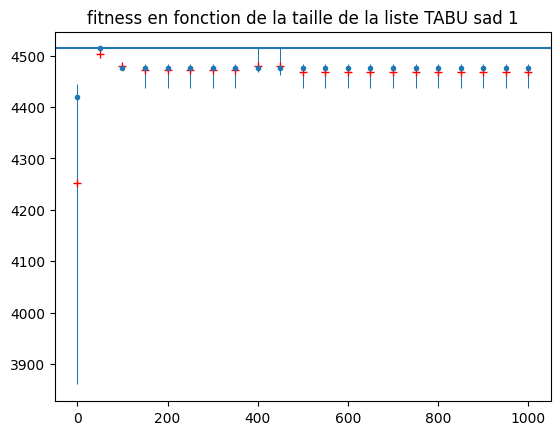

calcul: 100%|██████████| 21/21 [00:17<00:00,  1.22batch/s]


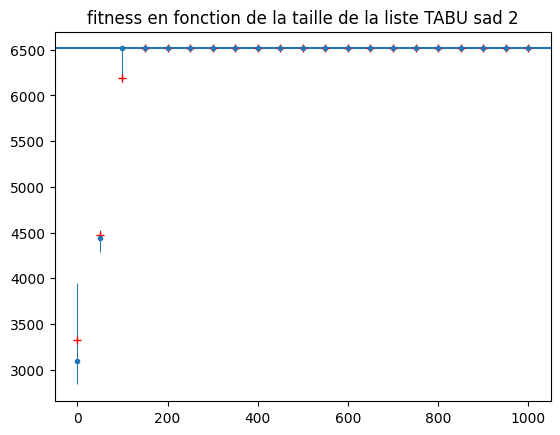

calcul: 100%|██████████| 21/21 [00:16<00:00,  1.26batch/s]


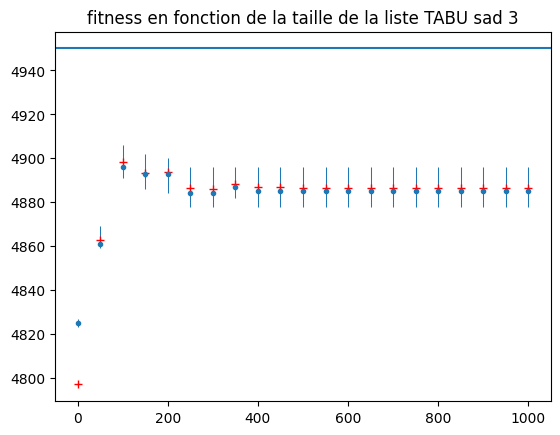

In [5]:
(variateur,title) = variateur_tabou_numpy.liste_tabou2()

test = Testor(tbs.tabou_numpy_solver(sad1,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(range(0,1001,50),variateur,group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.tabou_numpy_solver(sad2,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(range(0,1001,50),variateur,group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbs.tabou_numpy_solver(sad3,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(range(0,1001,50),variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")

calcul: 100%|██████████| 8/8 [00:07<00:00,  1.05batch/s]


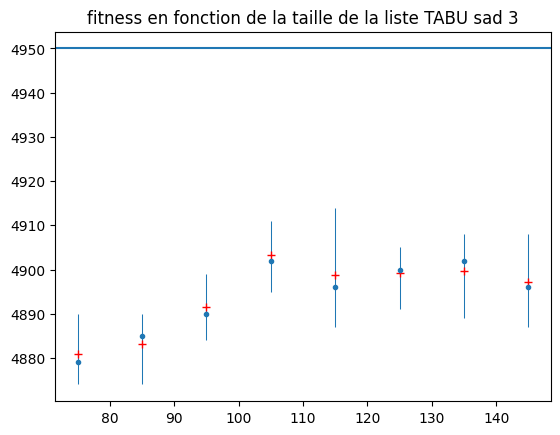

In [8]:
(variateur,title) = variateur_tabou_numpy.liste_tabou2()

test = Testor(tbs.tabou_numpy_solver(sad3,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(range(75,155,10),variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")

calcul: 100%|██████████| 10/10 [00:09<00:00,  1.03batch/s]


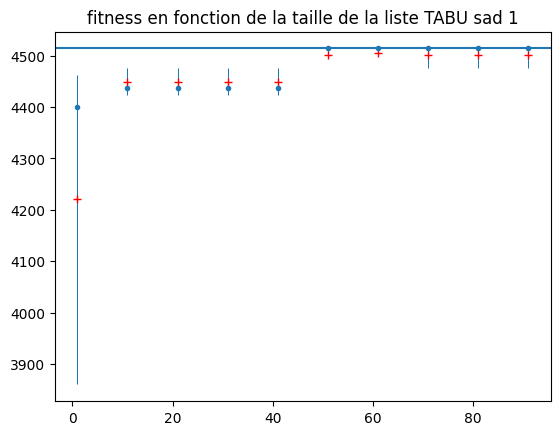

In [10]:
(variateur,title) = variateur_tabou_numpy.liste_tabou2()

test = Testor(tbs.tabou_numpy_solver(sad1,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(range(1,100,10),variateur,group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")


Pour le premier sac à dos : Les solutions sont globalement bonnes quoiqu'il arrive, vraiment bien autour de 50 et 60.

Pour le second : croissance jusqu'à 200, ensuite parfait à partir de 200 inclus.

Pour le troisième : croissance jusqu'à 110 puis on redescend jusqu'à platuer (trouver un plateau)

In [11]:
tabu_size_1=  50
tabu_size_2 = 200
tabu_size_3 = 110

calcul: 100%|██████████| 20/20 [00:09<00:00,  2.20batch/s]


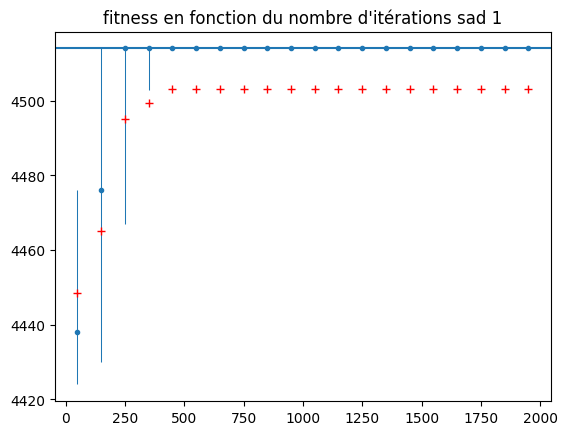

calcul: 100%|██████████| 20/20 [00:12<00:00,  1.60batch/s]


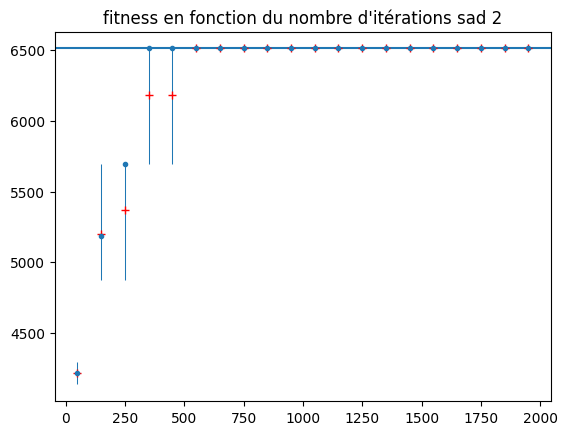

calcul: 100%|██████████| 4/4 [00:02<00:00,  1.52batch/s]


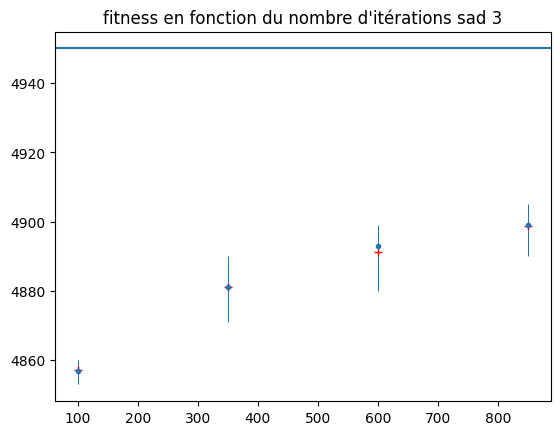

calcul: 100%|██████████| 11/11 [00:23<00:00,  2.18s/batch]


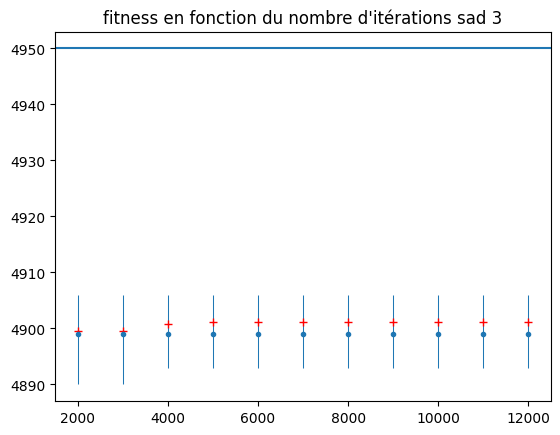

In [14]:
(variateur,title) = variateur_tabou_numpy.nombre_iterations()

solver = tbs.tabou_numpy_solver(sad1,iter_max,tabu_size_1,overflow_cost,init_size)
testResult = Testor(solver).test(range(50,2000,100),variateur,group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.tabou_numpy_solver(sad2,iter_max,tabu_size_2,overflow_cost,init_size))
testResult = test.test(range(50,2000,100),variateur,group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbs.tabou_numpy_solver(sad3,iter_max,tabu_size_3,overflow_cost,init_size))
testResult = test.test(range(100,1000,250),variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")
testResult = test.test(range(12000,1000,-1000),variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


sad1 : au delà de 1400, ça n'a pas l'air de changer grand chose (80% des résultats parfaits)

sad2 : à partir de 650, c'est litéralement parfait.

sad3 : bonne croissance entre 0 et 1000, et ça ce tasse ensuite (mêm si  ça croit)


## Le comptage négatif du poids supplémentaire

In [16]:
iter_max_1 = 500
iter_max_2 = 550
iter_max_3 = 4000

calcul: 100%|██████████| 16/16 [00:05<00:00,  2.88batch/s]


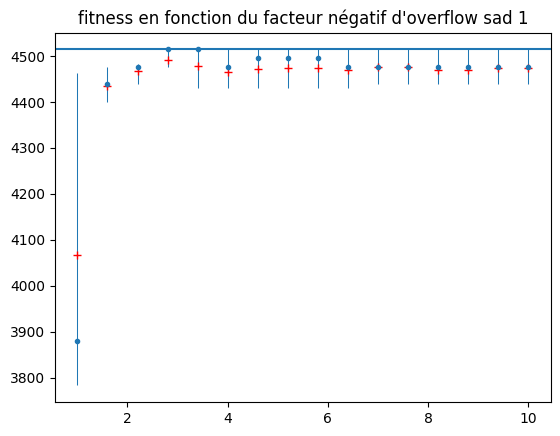

calcul: 100%|██████████| 16/16 [00:06<00:00,  2.48batch/s]


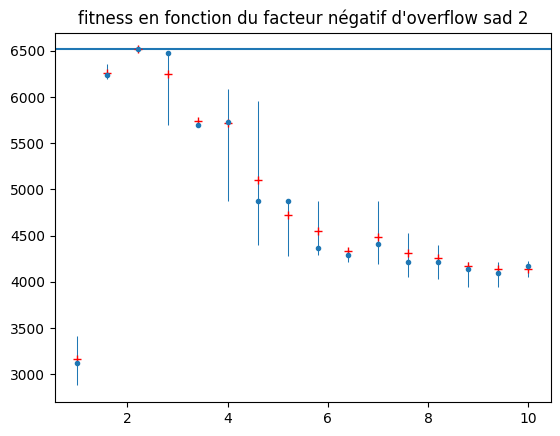

calcul: 100%|██████████| 16/16 [00:20<00:00,  1.28s/batch]


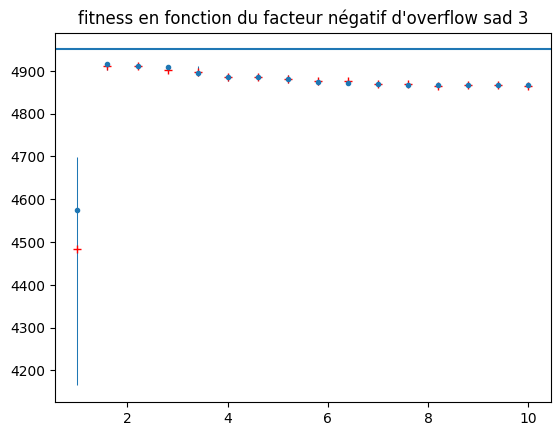

In [17]:
iter = floatRange(1,10,0.6)

(var,titre) = variateur_tabou_numpy.compte_negatif_des_points()

solver = tbs.tabou_numpy_solver(sad1,iter_max_1,tabu_size_1,0,init_size)
testResult = Testor(solver).test(iter ,var,group_size)
graph_test_result(testResult ,sol_opti1,titre+ " sad 1")

solver = tbs.tabou_numpy_solver(sad2,iter_max_2,tabu_size_2,0,init_size)
testResult = Testor(solver).test(iter ,var,group_size)
graph_test_result(testResult,sol_opti2,titre + " sad 2")

solver = tbs.tabou_numpy_solver(sad3,iter_max_3,tabu_size_3,0,init_size)
testResult = Testor(solver).test(iter,var,group_size)
graph_test_result(testResult,sol_opti3,titre + " sad 3")



In [ ]:
r1 = sad1.get_max_ratio()
print("ratio max 1 : ",r1, "y'en a",sad1.count_by_ratio(r1))
print("ratio moy 1 : ",sad1.get_avg_ratio())
r1 = sad2.get_max_ratio()
print("ratio max 2 : ",r1, "y'en a",sad2.count_by_ratio(r1))
print("ratio moy 2 : ",sad2.get_avg_ratio())
r1 = sad3.get_max_ratio()
print("ratio max 1 : ",r1, "y'en a",sad3.count_by_ratio(r1))
print("ratio moy 3 : ",sad3.get_avg_ratio())

#1 était cool autour de 2.8
# 2 vers 2.2
# 3 vers 1.6

ratio max 1 :  1.0 y'en a 515
ratio moy 1 :  0.8971212121212079
ratio max 2 :  2.0526315789473686 y'en a 487
ratio moy 2 :  1.6184047748236545
ratio max 1 :  3.0 y'en a 1
ratio moy 3 :  1.0081909454560942


calcul:  91%|█████████ | 10/11 [00:09<00:00,  1.00batch/s]


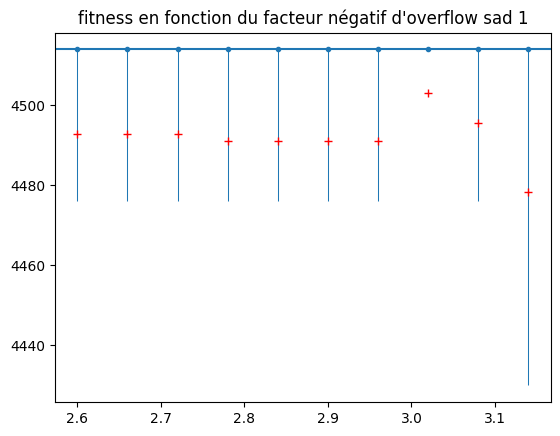

calcul:  91%|█████████ | 10/11 [00:12<00:01,  1.26s/batch]


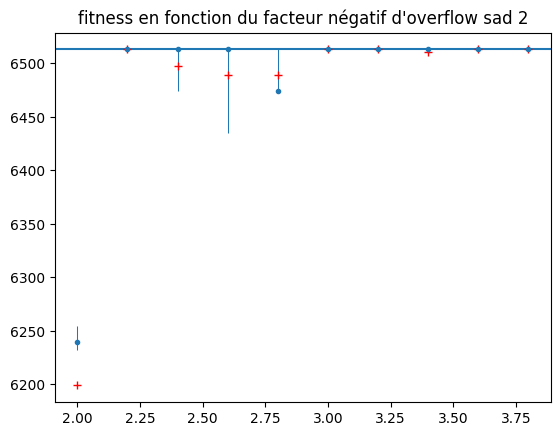

calcul: 100%|██████████| 9/9 [00:12<00:00,  1.36s/batch]


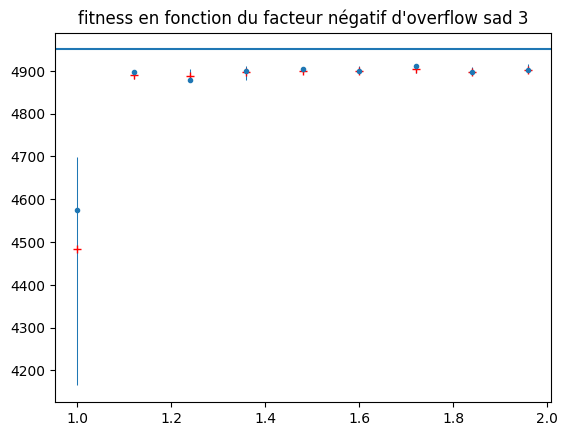

In [ ]:
# zoom 
(var,titre) = variateur_tabou_numpy.compte_negatif_des_points()

solver = tbs.tabou_numpy_solver(sad1,iter_max,tabu_size_1,0,init_size)
testResult = Testor(solver).test(floatRange(2.6,3.2,0.06) ,var,group_size)
graph_test_result(testResult ,sol_opti1,titre+ " sad 1")

solver = tbs.tabou_numpy_solver(sad2,iter_max,tabu_size_2,0,init_size)
testResult = Testor(solver).test(floatRange(2,4,0.2) ,var,group_size)
graph_test_result(testResult,sol_opti2,titre + " sad 2")

solver = tbs.tabou_numpy_solver(sad3,iter_max,tabu_size_2,0,init_size)
testResult = Testor(solver).test(floatRange(1.06,2,0.12) ,var,group_size)
graph_test_result(testResult,sol_opti3,titre + " sad 3")


sad1 :  3.02 a l'air pas mal !

sad2 : éviter la bosse entre 2.25 et 3 exclus : 3.02 ça marche aussi

sad3 : optimal à partir de +- 1.1 (mais pas parfait) et décroissance régulière à partir de 2.2 environ

à noter : Si le ratio prix/poids des items est trop grande dans le sac à dos, il faut modifier ce paramètre pour qu'il soit aussi grand que ce ratio (à rapporter dans le rapport final)

## variation de la taille de la solution initiale

In [22]:
over_cost1n2 = 2.75
over_cost3 = 1.24

calcul: 100%|██████████| 22/22 [00:18<00:00,  1.20batch/s]


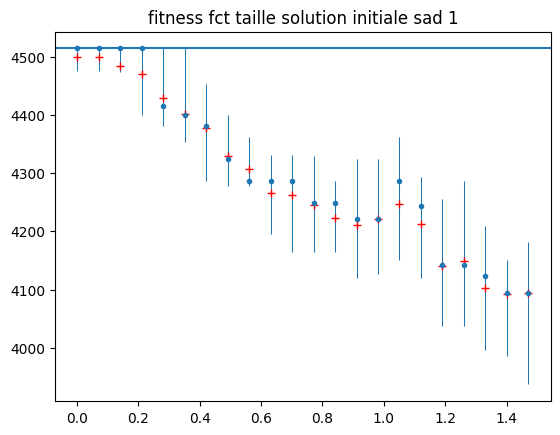

calcul: 100%|██████████| 22/22 [00:24<00:00,  1.10s/batch]


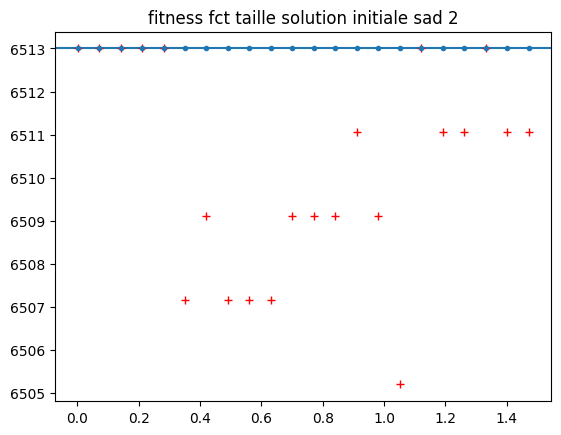

calcul: 100%|██████████| 22/22 [00:22<00:00,  1.03s/batch]


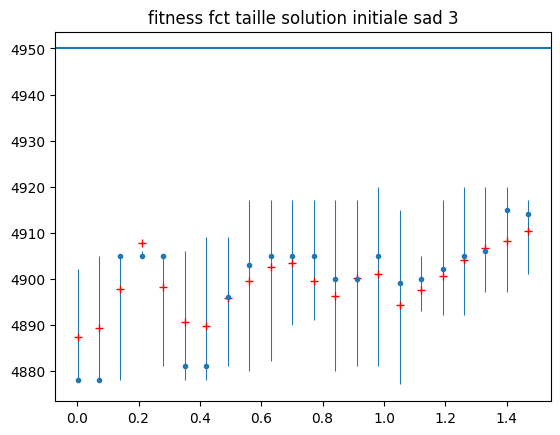

In [ ]:
(variateur,title) = variateur_tabou_numpy.poids_inital()
closeIter = floatRange(0.001,1.5,0.07)
test = Testor(tbs.tabou_numpy_solver(sad1,iter_max_1,tabu_size_1,over_cost1n2,init_size))
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.tabou_numpy_solver(sad2,iter_max_2,tabu_size_2,over_cost1n2,init_size))
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbs.tabou_numpy_solver(sad3,iter_max_3,tabu_size_3,over_cost3,init_size))
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


calcul: 100%|██████████| 10/10 [00:13<00:00,  1.38s/batch]


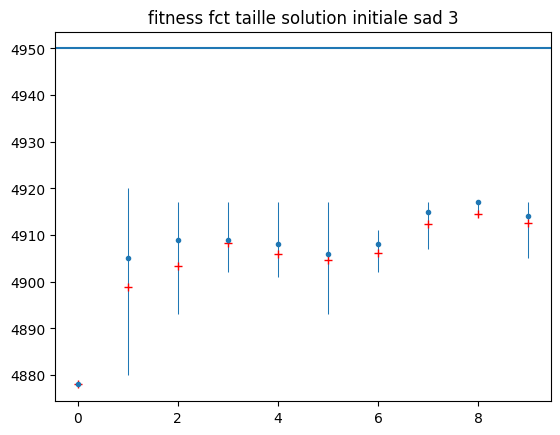

In [26]:
test = Testor(tbs.tabou_numpy_solver(sad3,iter_max_3,tabu_size_3,over_cost3,init_size))
testResult = test.test(range(0,10,1),variateur,group_size=group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")

pour le premier sac à dos, il vaut mieux garder un sac le plus vide possible (0.01 donne les meilleurs résultats) D'ailleurs, en partant d'une solution vide, on trouves toujours un résultat parfait.

Pour le second, c'est champ libre, ça n'a pas l'air d'empêcher l'algorithme de trouver des valeurs optimales

Pour le troisème, le mieux c'est de prendre un sac avec 8 fois trop de poids au départ... ou 1.4 fois trop remplis, si on veut rester raisonnable 

### Résultats "optimaux"

calcul: 100%|██████████| 8/8 [00:10<00:00,  1.27s/batch]


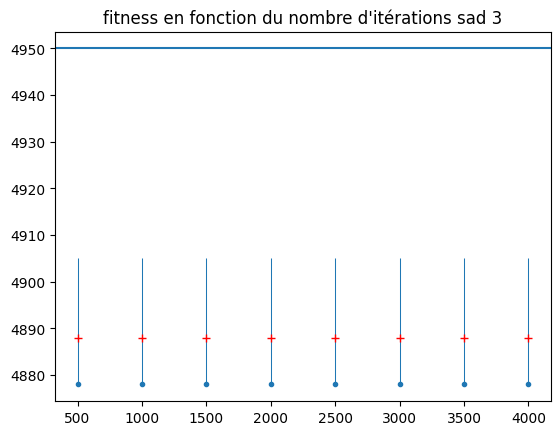

In [ ]:
(variateur,title) = variateur_tabou_numpy.nombre_iterations()
test = Testor(tbs.tabou_numpy_solver(sad3,iter_max_3,tabu_size_3,over_cost3,init_size))
testResult = test.test(range(4000,250,-500),variateur,group_size=group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")#on re-gègle car c'était très élever au cas ou

calcul: 100%|██████████| 9/9 [00:03<00:00,  2.55batch/s]


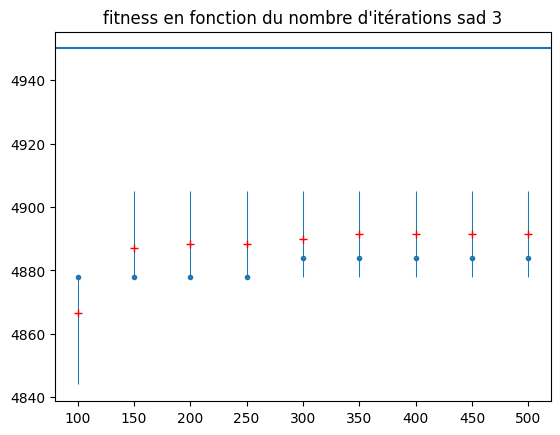

In [29]:
test = Testor(tbs.tabou_numpy_solver(sad3,iter_max_3,tabu_size_3,over_cost3,init_size))
testResult = test.test(range(500,50,-50),variateur,group_size=group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")#on re-gègle car c'était très élever au cas ou

In [ ]:
over_cost1n2 = 2.75
over_cost3 = 1.24

iter_max_1 = 500
iter_max_2 = 550
iter_max_3 = 400

taille_init1n2 = 0.01
taille_init3 = 1.4

tabu_size_1n2=  200
tabu_size_3 = 105

In [ ]:
solver1 = tbs.tabou_numpy_solver(sad1,tabu_size_1n2,tabu_size_1,overflow_cost,taille_init1n2)
solver2 = tbs.tabou_numpy_solver(sad2,tabu_size_1n2,tabu_size_2,overflow_cost,taille_init1n2)
solver3 = tbs.tabou_numpy_solver(sad3,tabu_size_3,tabu_size_3,overflow_cost,taille_init3)

#TODO : tester le temps que ça prend ?